In [1]:
#This notebook is for conducting PCA of Marinobacter pangenome gene frequencies
#Data is the gene frequency output produced from Anvi'o's pan functional enrichment analysis.

#packages required for this analysis
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [10]:
#Gene frequency file from anvio
mbpan_gene_freq_file = "mbpan-functions-occurrence-frequency.txt"

#metadata to add for plotting
deets = 'mb-clades-env-py.txt'

#Create the dataframe of gene frequencies
df1 = pd.read_csv(mbpan_gene_freq_file, sep='\t', header=None)
df2 = df1.T #transpose the data for use with sklearn

#Make the functions the column headers and drop column indices
df2.columns = df2.iloc[0]
df2 = df2.drop(df2.index[0])

#create a df of numbers to transform and save the corresponding genome names
df3 = df2.drop(['Genome'],axis=1) #matrix of frequencies only (no strings for PCA)
df4 = df2[['Genome']] #saving identifying info for each row for later
#fix the names of the cryopeg MAGs; these were operational names used during binning refinement
meta_names = {'Marinobacter_CB1':'CB1', 'Marinobacter_CBIA':'CBIA', 
              'Marinobacter_CBIW17':'CBIW17','Marinobacter_CBIW18':'CBIW18'} #dictionary correcting to sample name only
df4 = df4 #set as real object and not just copy of a slice
df4.replace(meta_names,inplace=True) #correct the meta_names

In [12]:
#Apply scaling to df3 to transform data appropriately for PCA
x = StandardScaler().fit_transform(df3)
#set up the PCA
pca = PCA(n_components=2)
#run the PCA on the transformed data
principalComponents = pca.fit_transform(x)
#make a dataframe with the results for plotting
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
#fix an indexing error so the genome names line up with their values
principalDf.index += 1
#add the genome names back to the pca df
df5 = pd.concat([principalDf, df4], axis=1)
#add in the clade details
df6 = pd.read_csv(deets, sep='\t', header=0)
df7 = df5.merge(df6,on='Genome')
#get the variance ratio numbers for the axes
pc1_var, pc2_var = pca.explained_variance_ratio_

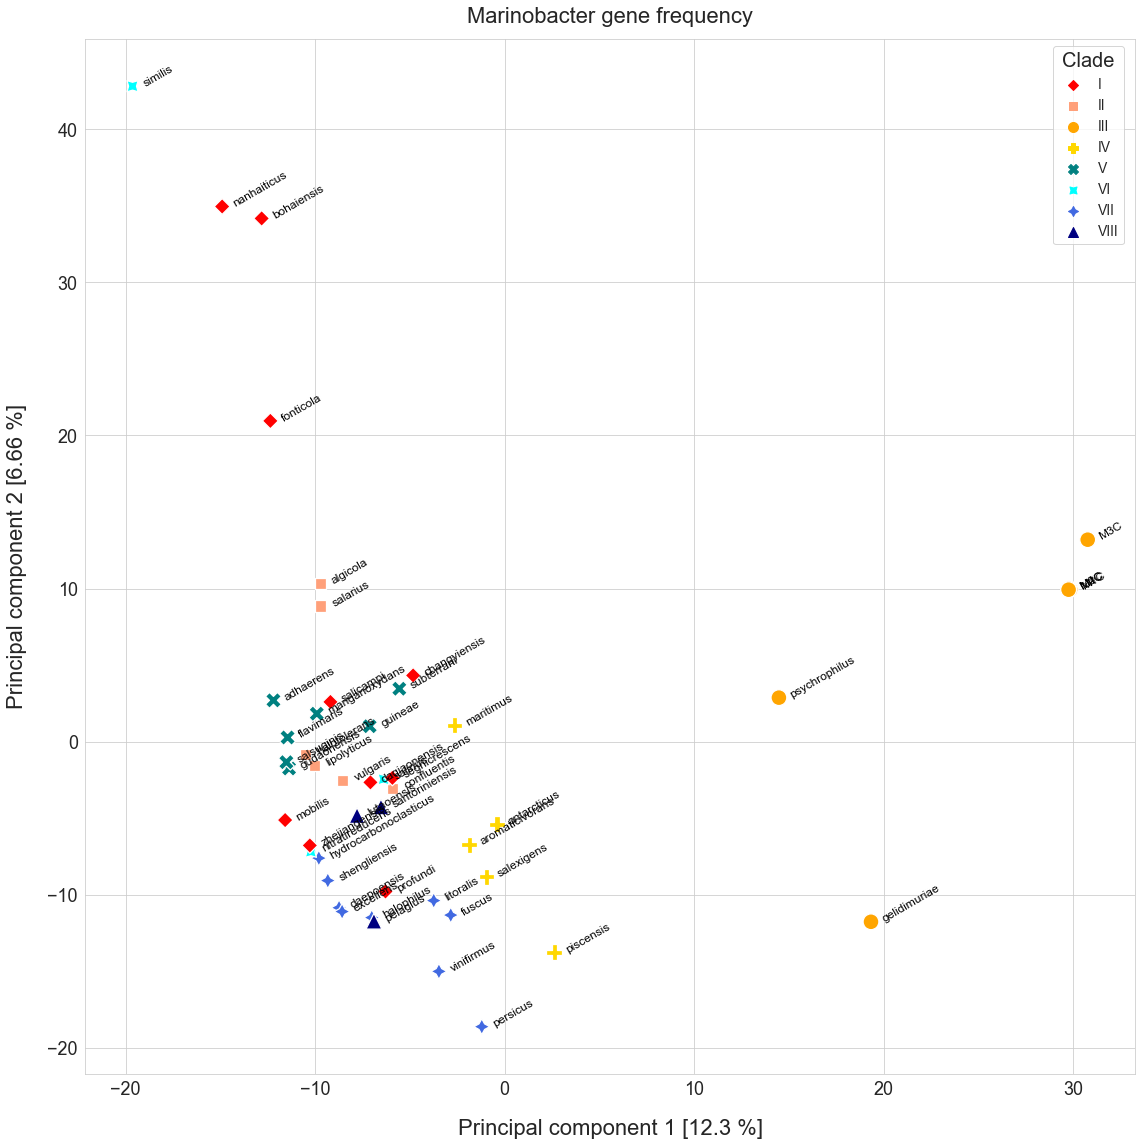

In [13]:
#ordered clades for legend
clades = ['I','II','III','IV','V','VI','VII','VIII']
#color pallette for the clades, consistent with other figures
clade_pal = {'I':'red','II':'lightsalmon','III':'orange','IV':'gold',
             'V':'teal','VI':'cyan','VII':'royalblue','VIII':'navy'}

#setting up plot
sns.set_style('whitegrid') #plot theme
fig,ax=plt.subplots(figsize=(16,16)) #setting size of figure
ax.tick_params(labelsize=18) #setting tick label size
#create seaborn scatterplot object
pca_plot = sns.scatterplot(x='pc1',y='pc2',data=df7, #setting axes and data
                           hue='Clade', hue_order=clades, style = 'Clade', #getting color and shapes set by clade
                           s=250,palette=clade_pal) #s is dot size, and using custom color pallette
#fixing the size of the markers in the legend box
lgnd = plt.legend(bbox_to_anchor=(0.915,1), loc="upper left", #setting legend location
                  fontsize=14, title='Clade', title_fontsize = 20) #fonts and title set
for i in range(8): #looping over legend labels to set the size
    lgnd.legendHandles[i]._sizes = [100]
#labelling axes
plt.xlabel(f'Principal component 1 [{100*pc1_var:.4g} %]',fontsize=22,labelpad = 20) #adding pc1 variability data to x-axis
plt.ylabel(f'Principal component 2 [{100*pc2_var:.4g} %]',fontsize=22,labelpad = 20) #adding pc2 variability data to y-axis
plt.title('Marinobacter gene frequency',size=22,y=1.01) #title

#adding labels for each genome to each point
#this gets busy so I have it off by default
for line in range(0,df7.shape[0]):
     pca_plot.text(df7.pc1[line]+0.5, df7.pc2[line], #setting location for text box for each dot in the plot
     df7.Genome[line], horizontalalignment='left', rotation=30, #getting Genome name for each dot and filling text box; also setting relative position and rotation of text
     size=12, color='black', weight='light') #setting text size and color

plt.tight_layout() #display the plot

#save it if you'd like
#plt.savefig('fig_editing/mbpan_gene_freq_pca.svg',dpi=300,format='svg')